In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ipywidgets import *
from IPython.display import display



plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
flame = pd.read_csv('/Users/tlee010/desktop/dsi-sf-2-timdavidlee/datasets/shape_clusters/flame.csv')
agg = pd.read_csv('/Users/tlee010/desktop/dsi-sf-2-timdavidlee/datasets/shape_clusters/aggregation.csv')
comp = pd.read_csv('/Users/tlee010/desktop/dsi-sf-2-timdavidlee/datasets/shape_clusters/compound.csv')
jain = pd.read_csv('/Users/tlee010/desktop/dsi-sf-2-timdavidlee/datasets/shape_clusters/jain.csv')
path = pd.read_csv('/Users/tlee010/desktop/dsi-sf-2-timdavidlee/datasets/shape_clusters/pathbased.csv')
r15 = pd.read_csv('/Users/tlee010/desktop/dsi-sf-2-timdavidlee/datasets/shape_clusters/r15.csv')
spiral = pd.read_csv('/Users/tlee010/desktop/dsi-sf-2-timdavidlee/datasets/shape_clusters/spiral.csv')

In [10]:
def get_X(df):
    return df.iloc[:,[0,1]].values



In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
km = KMeans()
ac = AgglomerativeClustering()
db = DBSCAN()
def plot_db_clusters(X,labels,axis):
    #fig, ax = plt.subplots(figsize=(4,4))
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, c in zip(unique_labels, colors):
        if k == -1:
            c = 'grey'

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        axis.scatter(xy[:, 0], xy[:, 1], color=c, s=70, label='class '+str(k))
    
    axis.legend(loc='lower right')
    plt.show()

def DBSCANplotter(eps=1.0, min_samples=4):
    db =DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    plot_db_clusters(X, db.fit_predict(X),ax1)
    
def DBSCANinteract():
    widgets.interact(DBSCANplotter
                     , eps=widgets.FloatSlider(min=0.0
                                               , max=5.0
                                               , step=0.05
                                               , value= 1.0
                                               , continuous_update=False
                                              )
                    , min_samples=widgets.IntSlider(min=1
                                                  , max=25
                                                  , step=1
                                                  , value=5
                                                  , continuous_update= False)
                    )

def Kmeansplotter(n_clusters=3):
    km =KMeans(n_clusters=n_clusters)
    km.fit(X)
    plot_db_clusters(X, km.labels_,ax2)
    
def Kmeansinteract():
    widgets.interact(Kmeansplotter
                    , n_clusters=widgets.IntSlider(min=1
                                                  , max=25
                                                  , step=1
                                                  , value=5
                                                  , continuous_update= False)
                    )
    
def AggCplotter(n_clusters=3):
    ac =AgglomerativeClustering(n_clusters=n_clusters)
    ac.fit(X)
    plot_db_clusters(X, ac.fit_predict(X),ax3)
    
def AggCinteract():
    widgets.interact(AggCplotter
                     , n_clusters=widgets.IntSlider(min=1
                                                  , max=25
                                                  , step=1
                                                  , value=5
                                                  , continuous_update= False)
                    )

def plot_all():
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

    widgets.interact(AggCplotter
                     , n_clusters=widgets.IntSlider(min=1
                                                  , max=25
                                                  , step=1
                                                  , value=5
                                                  , continuous_update= False)
                    )
    widgets.interact(Kmeansplotter
                    , n_clusters=widgets.IntSlider(min=1
                                                  , max=25
                                                  , step=1
                                                  , value=5
                                                  , continuous_update= False)
                    )
    widgets.interact(DBSCANplotter
                     , eps=widgets.FloatSlider(min=0.0
                                               , max=5.0
                                               , step=0.05
                                               , value= 1.0
                                               , continuous_update=False
                                              )
                    , min_samples=widgets.IntSlider(min=1
                                                  , max=25
                                                  , step=1
                                                  , value=5
                                                  , continuous_update= False)
                    )


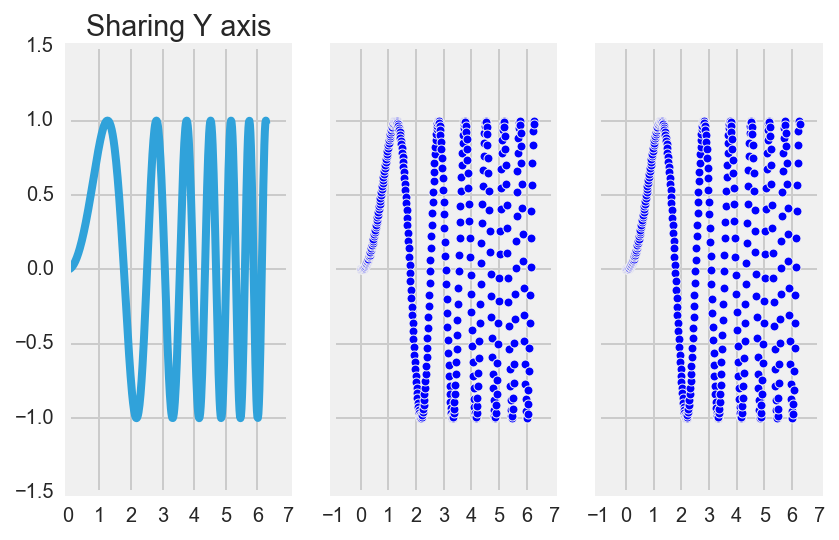

In [23]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
ax3.scatter(x, y)

In [26]:
X = get_X(flame)
y = flame['label'].values
plot_all()